## TOPIC MODELLING AND SENTIMENT ANALYSIS

## OBJECTIVE
To understand customer thought process and analyze their concerns in Retail domain

Topics
1. [Create Database : Scrape Website using Scrapy](#1)
2. [Data cleaning using NLTK](#2)
    1. [Tokenisation](#2)
    2. [Stop word removal](#2)
    3. [Lemmatization](#2)
3. [Topic modelling using LDA](#3)
    1.[Visualizing topics using PyLDAvis](#4)
4. [Sentiment Analysis usig Vader](#5)

<a id="1"></a>

## CREATE DATABASE : WEB SCRAPING USING SCRAPY 

#### Spider scipt to read reviews on a website

<img src = "Pycharm.jpg" align = "left" height = "1000" width="1000">

#### What the underlying page looks like in html

<img src = "Pycharm2.jpg" align = "left" height = "1000" width="1000">

#### Import all necessary libraries

In [20]:
import pandas as pd
import numpy as np
import re 

from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image # for world cloud image

# Spacy for preprocessing
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')


import string
import scipy.sparse

# Gensim libraries
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis.gensim
from gensim.models import CoherenceModel
from gensim import matutils
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [34]:
data=pd.read_csv("Retail_Reviews.csv") #for later use
df = pd.read_csv("Retail_Reviews.csv")
df.head()

,Title,Reviews
0,NaN,Absolutely wonderful - silky and sexy and comf...
1,NaN,Love this dress! it's sooo pretty. i happene...
2,Some major design flaws,I had such high hopes for this dress and reall...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl..."
4,Flattering shirt,This shirt is very flattering to all due to th...


<a id="2"></a>

## DATA CLEANING USING NLTK

In [35]:
df = df.fillna("None")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
Title      23486 non-null object
Reviews    23486 non-null object
dtypes: object(2)
memory usage: 367.0+ KB


,Title,Reviews
0,None,Absolutely wonderful - silky and sexy and comf...
1,None,Love this dress! it's sooo pretty. i happene...
2,Some major design flaws,I had such high hopes for this dress and reall...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl..."
4,Flattering shirt,This shirt is very flattering to all due to th...


In [36]:
# Remove the numbers from the review
df['Reviews'] = df['Reviews'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))

# Convert the reviews to lowercase
df['Reviews'] = df['Reviews'].map(lambda x: x.lower())

df.head()
# Break here for sentiment analysis
df_sent = df #parked for sentiment analyis

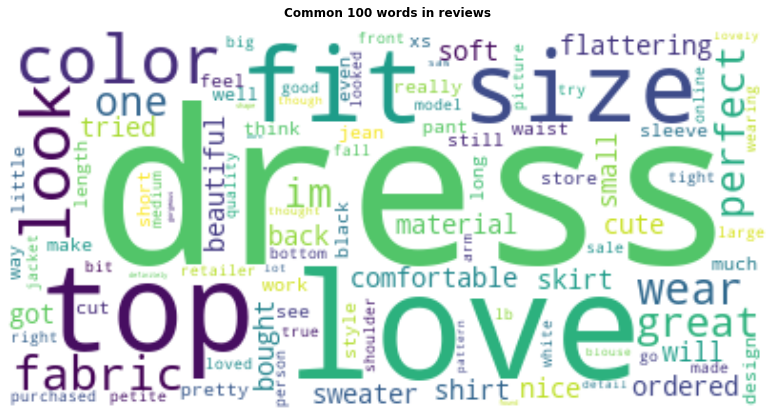

In [37]:
# Join the review.
long_string = ','.join(list(df.Reviews.values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

plt.figure(figsize= (20,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Common 100 words in reviews", pad = 14, weight = 'bold')

plt.show()

#### STOP WORDS : Most common words used in a text like “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.

Stop word removal can be sone via NLTK , Spacy and Gensim

In [38]:
import nltk
# nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

#### Text Normalization : Text normalization is a process of transforming a word into a single canonical form.

1. **Tokenisation** : Splitting phrase/ document into a single unit (words)
2. **Stop Word removel**
3. **Lemmatization /Stemming** : Lemmatization returns the lemma, which is the root word of all its inflection forms like ‘walking’ –> ‘walk’ /
rudimentary rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word

<div class="alert alert-block alert-info">
<b>Bonus tip:</b> Text normalization can be performned using NLTK,Spacy,Keras,Gensim,TextBlob  </div>

In [1]:
def lematized_review(text): # text
    rev_text = nlp(text)
    # Extract lematized words in lower case format if not digits, not punctuation, not stopword, and length not less than 2
    rev_text = ([token.lemma_.lower() for token in rev_text if not token.is_stop and token.text not in stop_words and not token.is_punct and len(token.text) > 3])
    return rev_text
df['Reviews'] = df['Reviews'].apply(lematized_review)

<a id="3"></a>

## Topic Modelling 

There are many approaches for obtaining topics from text like :
1. Term Frequency and Inverse Document Frequency. 
2. NonNegative Matrix Factorization techniques. 
3. Latent Dirichlet Allocation

<div class="alert alert-block alert-danger">
<b>  We will explore LDA here </b> when we have lists/arrays in Python.
</div>

## LDA Model for Topic modelling :

1. LDA is a **matrix factorization** technique. 

2. The matrix below shows a corpus of N documents D1, D2, D3 … Dn and vocabulary size of M words W1,W2 .. Wn. 
The value of i,j cell gives the frequency count of word Wj in Document Di.

<img src="lda.jpg" weight = "500" height = "500"> 


3. LDA converts this Document-Term Matrix 2 two lower dimensional matrices – M1 and M2.
M1 is a document-topics matrix and M2 is a topic – terms matrix with dimensions (N,  K) and (K, M) respectively,
where N is the number of documents, K is the number of topics and M is the vocabulary size.



<img src="lda2.jpg" weight = "500" height = "500"> 

<img src="lda3.jpg" weight = "500" height = "500"> 

4. It Iterates through each word "W" for each document "D" and tries to adjust the current topic – word assignment
with a new assignment. A new topic "K" is assigned to word "W" with a probability P which is a product of two
probabilities p1 and p2.

5. For every topic, two probabilities p1 and p2 are calculated. P1 – p(topic t / document d) = the proportion of words
in document d that are currently assigned to topic t. P2 – p(word w / topic t) = the proportion of assignments to
ic t over all documents that come from this word w.

6. The current topic – word assignment is updated with a new topic with the probability, product of p1 and p2 . 
In this step, the model assumes that all the existing word – topic assignments except the current word are correct.
This is essentially the probability that topic t generated word w, so it makes sense to adjust the current word’s
topic with new probability.

7. After a number of iterations, a steady state is achieved where the document topic and topic term distributions 
are fairly good. This is the convergence point of LDA.

#### Parameters in LDA

1. **Alpha and Beta Hyperparameters** Alpha represents document-topic density and Beta represents topic-word density. 
Higher the value of alpha, documents are composed of more topics and lower the value of alpha, documents contain
fewer topics. On the other hand, higher the beta, topics are composed of a large number of words in the corpus, 
d with the lower value of beta, they are composed of few words.

2. **Number of Topics** - Number of topics to be extracted from the corpus. Researchers have developed approaches to 
tain an optimal number of topics by using **Kullback Leibler Divergence Score** 

3. **Number of Topic Terms** – Number of terms composed in a single topic. It is generally decided according to the
requirement. If the problem statement talks about extracting themes or concepts, it is recommended to choose a 
higher number, if problem statement talks about extracting features or terms, a low number is recommended.

4. **Number of Iterations / passes** – Maximum number of iterations allowed to LDA algorithm for convergence.

In [11]:
clean_review = df['Reviews'] 


 # Create Dictionary# Create 
id2word_1 = corpora.Dictionary(clean_review)

# Create Corpus: Term Document Frequency
corpus_1 = [id2word_1.doc2bow(Reviews) for Reviews in clean_review]

 # Build LDA model
ldamodel = LdaMulticore(corpus= corpus_1, num_topics =8, id2word=id2word_1,chunksize=2000, passes=50,per_word_topics=True)


In [12]:
from pprint import pprint
pprint(ldamodel.show_topics(formatted=False))

[(0,
  [('wear', 0.054689165),
   ('love', 0.04462545),
   ('great', 0.038096555),
   ('comfortable', 0.022320835),
   ('perfect', 0.020464849),
   ('look', 0.018678375),
   ('color', 0.016901806),
   ('dress', 0.014777883),
   ('soft', 0.014701645),
   ('buy', 0.014044242)]),
 (1,
  [('shirt', 0.07862335),
   ('skirt', 0.061554875),
   ('fabric', 0.018744228),
   ('wash', 0.01871962),
   ('material', 0.01743639),
   ('nice', 0.01500339),
   ('cute', 0.011158345),
   ('love', 0.011095313),
   ('little', 0.010866379),
   ('great', 0.010269165)]),
 (2,
  [('short', 0.036342937),
   ('long', 0.032313403),
   ('length', 0.03155386),
   ('pant', 0.030422647),
   ('petite', 0.028866883),
   ('size', 0.028668828),
   ('jean', 0.02104286),
   ('love', 0.019416599),
   ('like', 0.018824495),
   ('regular', 0.015300638)]),
 (3,
  [('look', 0.06630691),
   ('like', 0.05051867),
   ('material', 0.018495172),
   ('sweater', 0.018210234),
   ('feel', 0.016517084),
   ('fabric', 0.015915882),
   ('pi

#### Visualisation of LDA model

In [18]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus_1, id2word_1)
vis

C:\Users\ssharm35\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.037509  0.167562       1        1  20.963018
7     -0.057160  0.044830       2        1  14.085002
0     -0.208838 -0.126702       3        1  13.658939
6     -0.050704  0.010823       4        1  12.949676
5      0.036663 -0.167907       5        1  12.803616
2     -0.087674  0.139200       6        1  10.491096
3      0.167978 -0.047602       7        1   8.952319
1      0.162226 -0.020204       8        1   6.096338, topic_info=     Category          Freq        Term         Total  loglift  logprob
7     Default  11625.000000       dress  11625.000000  30.0000  30.0000
63    Default   2709.000000       shirt   2709.000000  29.0000  29.0000
81    Default   2217.000000       skirt   2217.000000  28.0000  28.0000
100   Default   8997.000000        look   8997.000000  27.0000  27.0000
56    Default   9730.000000        wear   9730.000000  26.0000  26.0000
43    Default   5085.000000       small   5085.000000  25.0000  25.0000
42    Default   9879.000000        size   9879.000000  24.0000  24.0000
107   Default   1998.000000        pant   1998.000000  23.0000  23.0000
99    Default   7418.000000        like   7418.000000  22.0000  22.0000
314   Default   2839.000000       short   2839.000000  21.0000  21.0000
68    Default   6792.000000       color   6792.000000  20.0000  20.0000
19    Default   2392.000000      petite   2392.000000  19.0000  19.0000
316   Default   2581.000000     sweater   2581.000000  18.0000  18.0000
252   Default   2060.000000        jean   2060.000000  17.0000  17.0000
74    Default   3110.000000        long   3110.000000  16.0000  16.0000
13    Default   2576.000000      length   2576.000000  15.0000  15.0000
200   Default   3268.000000       large   3268.000000  14.0000  14.0000
136   Default   4727.000000      fabric   4727.000000  13.0000  13.0000
36    Default   2193.000000      medium   2193.000000  12.0000  12.0000
53    Default   5880.000000       great   5880.000000  11.0000  11.0000
62    Default   3598.000000     perfect   3598.000000  10.0000  10.0000
61    Default   1359.000000        pair   1359.000000   9.0000   9.0000
209   Default   2254.000000       waist   2254.000000   8.0000   8.0000
468   Default   1042.000000        wash   1042.000000   7.0000   7.0000
341   Default   1228.000000      jacket   1228.000000   6.0000   6.0000
150   Default   2756.000000    material   2756.000000   5.0000   5.0000
15    Default   9989.000000        love   9989.000000   4.0000   4.0000
123   Default   3008.000000        nice   3008.000000   3.0000   3.0000
139   Default   1098.000000     regular   1098.000000   2.0000   2.0000
50    Default   1032.000000  compliment   1032.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
150    Topic8    531.210938    material   2756.535645   1.1509  -4.0492
486    Topic8    125.439171        seam    339.926239   1.8006  -5.4925
1107   Topic8     94.259308   complaint    218.053711   1.9588  -5.7783
37     Topic8    207.466415      nicely    766.634155   1.4904  -4.9894
325    Topic8    193.494415       thick    707.533813   1.5009  -5.0591
123    Topic8    457.087982        nice   3008.733154   0.9131  -4.1995
136    Topic8    571.055054      fabric   4727.650391   0.6838  -3.9769
564    Topic8    118.192093    stretchy    359.590729   1.6848  -5.5520
521    Topic8     94.040222     elastic    253.468887   1.8060  -5.7806
903    Topic8    129.397537      cotton    455.308594   1.5394  -5.4615
293    Topic8    202.680649      button   1080.924683   1.1235  -5.0127
290    Topic8    339.946228        cute   2921.487061   0.6464  -4.4956
14     Topic8    331.051300      little   3674.154785   0.3907  -4.5221
209    Topic8    243.843597       waist   2254.983154   0.5731  -4.8278
53     Topic8    312.856781       great   5880.252441  -0.1361  -4.5786
149    Topic8    249.886154      

<div class="alert alert-block alert-info">
<b>Bonus Tip</b> Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.
A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.</div>

#### Finding Dominant topics

In [13]:
corpus = corpus_1
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [14]:
df_topic_sents_keywords = format_topics_sentences(ldamodel,corpus_1,data['Reviews'])

In [15]:
df_topic_sents_keywords.head()

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Reviews
0,0.0,0.4675,"wear, love, great, comfortable, perfect, look,...",Absolutely wonderful - silky and sexy and comf...
1,7.0,0.5163,"dress, wear, love, size, like, beautiful, fit,...",Love this dress! it's sooo pretty. i happene...
2,4.0,0.5878,"size, small, order, large, look, like, medium,...",I had such high hopes for this dress and reall...
3,0.0,0.9203,"wear, love, great, comfortable, perfect, look,...","I love, love, love this jumpsuit. it's fun, fl..."
4,0.0,0.4298,"wear, love, great, comfortable, perfect, look,...",This shirt is very flattering to all due to th...


<a id="5"></a>

## Sentiment Analysis

In [48]:
analyzer = SentimentIntensityAnalyzer()

In [54]:
df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in df_sent['Reviews']]
df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in df_sent['Reviews']]
df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in df_sent['Reviews']]
df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in df_sent['Reviews']]

In [57]:
df.head()

,Title,Reviews,compound,neg,neu,pos
0,None,absolutely wonderful silky and sexy and comfo...,0.8932,0.000,0.272,0.728
1,None,love this dress its sooo pretty i happened t...,0.9719,0.000,0.701,0.299
2,Some major design flaws,i had such high hopes for this dress and reall...,0.9398,0.025,0.809,0.166
3,My favorite buy!,i love love love this jumpsuit its fun flirty ...,0.4805,0.211,0.403,0.387
4,Flattering shirt,this shirt is very flattering to all due to th...,0.9162,0.000,0.713,0.287


In [2]:
### Next step

In [ ]:
join with topic df
for each topic count positive n negative sentiments